In [1]:
import numpy as np
import pandas as pd
from models import Hankel,Rank,Cluster,Meepc
import warnings
warnings.simplefilter('ignore')
import math
from sklearn.pipeline import Pipeline
from sklearn import set_config
from matplotlib import style
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
set_config(display='diagram')

In [3]:
hankel = Hankel.Hankel()
rank = Rank.Rank()
cluster = Cluster.Cluster()
meepc = Meepc.MEEPC()

In [4]:
df = pd.read_csv('~/data/training_data.csv')
sensors = [3,9,25,43]
df = df.iloc[:, sensors]

In [5]:
temp=df.iloc[:,-1]
temp

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
971995    0.0
971996    0.0
971997    0.0
971998    0.0
971999    0.0
Name: 2_LS_101_AH, Length: 972000, dtype: float64

In [6]:
temp.value_counts()

0.0    969986
1.0      2014
Name: 2_LS_101_AH, dtype: int64

In [7]:
def calc_width_height(v):
    width = 2/np.sqrt(v) 
    return width

    
def draw_ellipse(i,j,centers,widths,X):
    
    plt.xlim(centers[i]-widths[i]/2,centers[i]+widths[i]/2)
    plt.ylim(centers[j]-widths[j]/2,centers[j]+widths[j]/2)

    ellipse = Ellipse(xy=(centers[i], centers[j]), width=widths[i], height=widths[j])
    ellipse.fill = False
    ellipse.set_ec('red')
    ax.add_patch(ellipse)
    plt.scatter(x = X[::,i], y = X[::,j])
    

5
r: 2
r: 3
r: 3
r: 2
r: 2


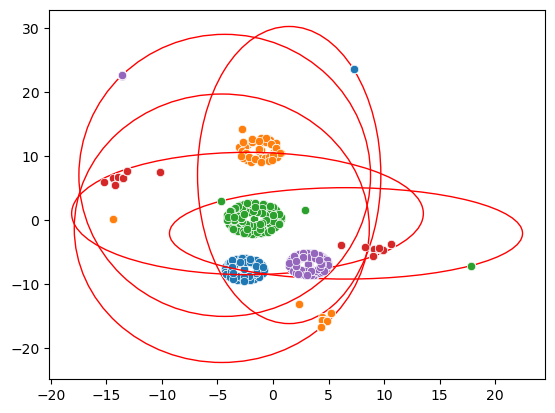

[1.000055438694641,
 1.0000049271834053,
 1.0000317543622292,
 1.000002253378944,
 1.0001085253811217]

In [20]:
X = df.iloc[:,1].values
X = hankel.fit(X,30,0.5)
kmeans,optimal_k = cluster.fit(X)
print(optimal_k)
radiis = []
weights=[]
centers=[]
topR=[]
tsne=TSNE(n_components=2,perplexity=30)
for i in range(optimal_k):
    cluster_ = X[np.where(kmeans.labels_ == i)[0]]
    r = rank.fit(cluster_)
    topR.append(r)
    print("r: "+str(r))
    U,Sigma,VT = np.linalg.svd(cluster_)
    V = VT.T
    cluster_ = np.matmul(cluster_,V[:,:r])
    # cluster_=tsne.fit_transform(cluster_)
    weight,center = meepc.fit(cluster_)
    weights.append(weight)
    centers.append(center)
    widths=calc_width_height(weight)
    var1=np.square(cluster_-center)
    var2=np.matmul(weight,var1.T)
    max_radius=math.sqrt(np.amax(var2))
    radiis.append(max_radius)
    #plotting
    ax = plt.gca()
    ellipse = Ellipse(xy=(center[0],center[1]), width=widths[0], height=widths[1])
    ellipse.fill = False 
    ellipse.set_ec('red')
    ax.add_patch(ellipse)
    sns.scatterplot(x = cluster_[:,0], y = cluster_[:,1])
plt.show()
radiis



In [9]:
topR

[80, 80]

In [10]:
if math.isnan(max_radius):
        print('Rank: ',r)
        print('Cluster Shape: ',cluster.shape)
        print('CLuster: ',cluster)
        print('Weight Shape: ', weight.shape)
        print('Weight: ', weight)
        print('Center Shape: ', center.shape)
        print('Center: ', center)
        print('Var1: ', var1)
        print('Var2: ', var2)

# testing 

In [11]:
df_test=pd.read_csv('~/data/testdata.csv')
df_test

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LT_001_PV,1_MV_001_STATUS,1_MV_002_STATUS,1_MV_003_STATUS,...,3_AIT_001_PV,3_AIT_002_PV,3_AIT_003_PV,3_AIT_004_PV,3_AIT_005_PV,3_FIT_001_PV,3_LT_001_PV,LEAK_DIFF_PRESSURE,TOTAL_CONS_REQUIRED_FLOW,"Attack LABLE (1:No Attack, -1:Attack)"
0,161.129,0.721464,11.7842,463.716,0.267211,1.890010,48.9329,2.0,1.0,1.0,...,0.0,8279.1,5.95083,743.356,0.594601,0.001333,64.5137,74.2107,1.92,1.0
1,161.129,0.721464,11.7842,463.716,0.267211,1.890010,48.9329,2.0,1.0,1.0,...,0.0,8279.1,5.95083,743.356,0.594601,0.001333,64.5137,74.2107,1.92,1.0
2,161.129,0.721464,11.7842,463.716,0.267211,1.890010,48.9329,2.0,1.0,1.0,...,0.0,8279.1,5.95083,743.356,0.594601,0.001333,64.5137,74.2107,1.92,1.0
3,161.129,0.721464,11.7842,463.716,0.267211,1.890010,48.9329,2.0,1.0,1.0,...,0.0,8279.1,5.95083,743.356,0.594601,0.001333,64.5137,74.2107,1.92,1.0
4,161.129,0.721464,11.7842,463.716,0.267211,1.890010,48.9329,2.0,1.0,1.0,...,0.0,8279.1,5.95083,743.356,0.594601,0.001333,64.5137,74.2107,1.92,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248395,176.467,0.613474,11.9281,430.680,0.228327,0.001214,66.1851,1.0,1.0,1.0,...,0.0,8279.1,13.83640,370.386,0.729505,0.595032,64.3879,66.1173,1.41,1.0
248396,176.467,0.613474,11.9281,430.680,0.228327,0.001214,66.1851,1.0,1.0,1.0,...,0.0,8279.1,13.83640,370.386,0.729505,0.595032,64.3879,66.1173,1.41,1.0
248397,176.467,0.613474,11.9281,430.680,0.228327,0.001214,66.1851,1.0,1.0,1.0,...,0.0,8279.1,13.83640,370.386,0.729505,0.595032,64.3879,66.1173,1.41,1.0
248398,176.467,0.613474,11.9281,430.680,0.228327,0.001214,66.1851,1.0,1.0,1.0,...,0.0,8279.1,13.83640,370.386,0.729505,0.595032,64.3879,66.1173,1.41,1.0


In [12]:
y_actual=df_test.iloc[:,-1]
sensors = [3,9,25,43]
df_test = df_test.iloc[:, sensors]
df_test

,1_AIT_004_PV,1_MV_003_STATUS,2_FIC_401_CO,2_LS_101_AH
0,463.716,1.0,20.2507,0.0
1,463.716,1.0,20.2507,0.0
2,463.716,1.0,20.2507,0.0
3,463.716,1.0,20.2507,0.0
4,463.716,1.0,20.2507,0.0
...,...,...,...,...
248395,430.680,1.0,19.2170,0.0
248396,430.680,1.0,19.2170,0.0
248397,430.680,1.0,19.2170,0.0
248398,430.680,1.0,19.2170,0.0


In [13]:
y_actual.value_counts()

 1.0    246888
-1.0      1512
Name: Attack LABLE (1:No Attack, -1:Attack), dtype: int64

In [14]:
X_test=df_test.iloc[:,1].values

In [19]:
Xtest=hankel.fit(X_test,15,0.5)
U,S,VT=np.linalg.svd(Xtest)
V=VT.T
isanomaly=True
clusteR=[]
for i in range(optimal_k):
    Xtest_cluster=np.matmul(Xtest,V[:,:topR[i]])
    var1=np.square(Xtest_cluster-centers[i])
    var2=np.matmul(weights[i],var1.T)
    widths=calc_width_height(weights[i])
    # ax = plt.gca()
    # ellipse = Ellipse(xy=(centers[i][0],centers[i][1]), width=widths[0], height=widths[1])
    # ellipse.fill = False 
    # ellipse.set_ec('red')
    # ax.add_patch(ellipse)
    # testcluster_2d=tsne.fit_transform(Xtest_cluster)
    # sns.scatterplot(x=testcluster_2d[:,0],y=testcluster_2d[:,1])
    # plt.xlim(-4,4)
    print("max radii",math.sqrt(np.amax(var2)))
    # if(np.amax(var2)<radiis[i]):
    #     isanomaly=False
    # break
# plt.show()

max radii 41.01166725801447
max radii 41.705994293341
